In [1]:
import autograd.numpy as anp
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pymanopt


from manifold_optimization import ManifoldDOE, ManifoldSolver, run_experiment

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
manifold = pymanopt.manifolds.SpecialOrthogonalGroup(3)


def cost(point):
  return anp.sum(anp.diag(point))


def constraint(point):
  return point[-1][-1] - 1 # forces result into a xy rotation matrix with bottom right corodinate = 1


def constraint2(point):
  return 0. # always satisfied


result = run_experiment(manifold, cost, [constraint, constraint2], max_iterations=10_000)

/Users/antonpetushkov/miniforge3/envs/na599/lib/python3.9/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Point found: [[-1.00000000e+00  7.00964304e-06  1.36596621e-09]
 [-7.00964304e-06 -1.00000000e+00 -9.98133813e-09]
 [ 1.36589625e-09 -9.98134770e-09  1.00000000e+00]]; iterations run: 1314; stopping reason: Gradient norm too small!


In [3]:
manifold = pymanopt.manifolds.SpecialOrthogonalGroup(3)


@pymanopt.function.autograd(manifold)
def cost(point):
  return anp.sum(anp.diag(point))


@pymanopt.function.autograd(manifold)
def constraint(point):
  return point[-1][-1] - 1 # forces result into a xy rotation matrix with bottom right corodinate = 1


@pymanopt.function.autograd(manifold)
def constraint2(point):
  return 0. # always satisfied


problem = ManifoldDOE(manifold, cost, [constraint])
solver = ManifoldSolver(max_iterations=10_000)
result = solver.run(problem)
print(result.point, result.iterations)

[[-1.00000000e+00  7.00964304e-06  1.36596621e-09]
 [-7.00964304e-06 -1.00000000e+00 -9.98133813e-09]
 [ 1.36589625e-09 -9.98134770e-09  1.00000000e+00]] 1314


In [4]:
manifold = pymanopt.manifolds.Sphere(3)


@pymanopt.function.autograd(manifold)
def cost(point: npt.NDArray):
  (x, y, z) = point
  return 100 * x**2 + (y + (1 - x)**2)**2


@pymanopt.function.autograd(manifold)
def constraint(point: npt.NDArray):
  (x, y, z) = point
  return x + y ** 2


@pymanopt.function.autograd(manifold)
def constraint1(point: npt.NDArray):
  (x, y, z) = point
  return 0.75 + x + y


problem = ManifoldDOE(manifold, cost, [constraint, constraint1])
solver = ManifoldSolver(max_iterations=10000)
result = solver.run(problem)
print(result.point, result.iterations)

[-0.24999939 -0.49999953  0.82915667] 129


In [5]:
manifold = pymanopt.manifolds.Sphere(3)


@pymanopt.function.autograd(manifold)
def cost(point: npt.NDArray):
  (x, y, z) = point
  return x**2 - y + z**3


@pymanopt.function.autograd(manifold)
def constraint(point: npt.NDArray):
  (x, y, z) = point
  theta = anp.arccos(x / anp.sqrt(x**2 + y**2))
  return z - 0.5 * (anp.cos(2 * theta))**2 + 0.25


@pymanopt.function.autograd(manifold)
def constraint1(point: npt.NDArray):
  (x, y, z) = point
  return 0.75 + x + y


problem = ManifoldDOE(manifold, cost, [constraint])
solver = ManifoldSolver(max_iterations=10000)
result = solver.run(problem, initial_point=np.asarray([1, 1, 1]) / anp.sqrt(3))
print(result.point, result.iterations)

[8.77273753e-06 9.68245837e-01 2.50000000e-01] 923


In [6]:
#need to change step size to 0.01 to reproduce results
manifold = pymanopt.manifolds.Euclidean(2)

@pymanopt.function.autograd(manifold)
def cost(point):
  (x, y) = point
  return (1 - x)**2 + 100*(y - x**2)**2

@pymanopt.function.autograd(manifold)
def constraint(point):
  (x, y) = point
  return (x - 1)**2 + y**2 - 1

problem = ManifoldDOE(manifold, cost, [constraint])
solver = ManifoldSolver(max_iterations=10000)
result = solver.run(problem, np.array([2, 0.5]), step_size=0.01)
print(result.point, result.iterations)

[1.00000451 1.00000892] 9982


In [7]:
#need to change step size to 0.01 to reproduce results
manifold = pymanopt.manifolds.Euclidean(2)

def cost(point):
  (x, y) = point
  return (1 - x)**2 + 100*(y - x**2)**2

def constraint(point):
  (x, y) = point
  return (x - 1)**2 + y**2 - 1

result = run_experiment(manifold, cost, [constraint], max_iterations=10_000, step_size=0.01, initial_point=np.array([2, 0.5]))

Point found: [1.00000451 1.00000892]; iterations run: 9982; stopping reason: Gradient norm too small!


In [8]:
#need to change step size to 0.01 to reproduce results
manifold = pymanopt.manifolds.Grassmann(3, 3)

def cost(point):
  return anp.prod(anp.diag(point))

def constraint(point):
  return point[-1][-1] - 1

result = run_experiment(manifold, cost, [constraint], max_iterations=10_000)

Point found: [[-2.85263123e-01 -9.58449243e-01 -5.76157630e-15]
 [ 9.58449243e-01 -2.85263123e-01 -6.33023103e-15]
 [ 4.40158283e-15 -7.30355389e-15  1.00000000e+00]]; iterations run: 61; stopping reason: Gradient norm too small!


In [13]:
dim = 3
manifold = pymanopt.manifolds.SymmetricPositiveDefinite(dim)


mat = manifold.random_point()#np.random.randn(dim, dim)

def cost(point):
  return anp.linalg.norm(mat - point, 'fro')

def constraint(point):
  return point[2][1] - 1

result = run_experiment(
  manifold, 
  cost, 
  [constraint],
  max_iterations=20_000, 
  learning_rate=0.1
)

Point found: [[ 1.1362232   0.01890255 -0.09306963]
 [ 0.01890255  1.12002244  1.        ]
 [-0.09306963  1.          1.3871134 ]]; iterations run: 1582; stopping reason: Gradient norm too small!


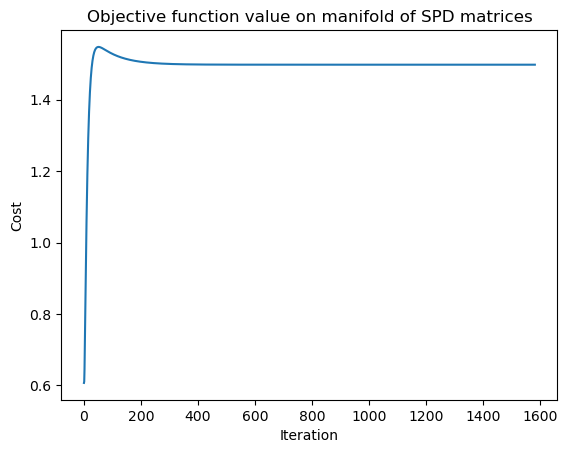

In [14]:
plt.title("Objective function value on manifold of SPD matrices")
plt.plot(np.arange(
    len(result.log["costs"])), result.log["costs"])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.savefig("Cost violation.png")

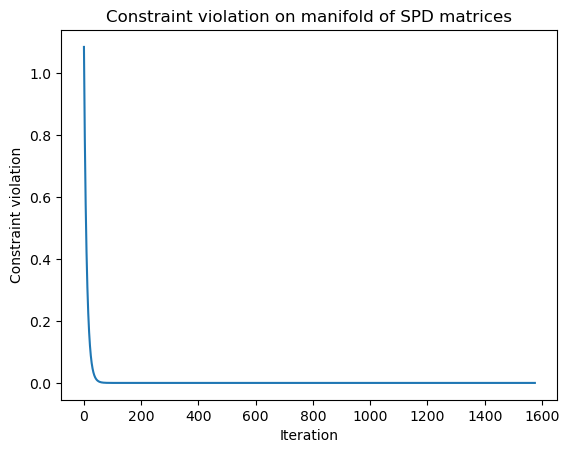

In [11]:
plt.title("Constraint violation on manifold of SPD matrices")
plt.plot(np.arange(len(result.log["constraint_violations"])), result.log["constraint_violations"])
plt.xlabel("Iteration")
plt.ylabel("Constraint violation")
plt.savefig("Constraint violation.png")